In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
import numpy.linalg as la

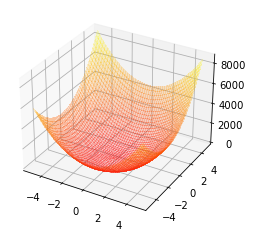

In [2]:
def f(x):
    k1 = 100    #N/m
    k2 = 90     #N/m
    Fx1,Fx2 = 20,40
    x1 = x[0]
    x2 = x[1]
    ans = k1*(np.sqrt(x1**2+(x2+1)**2)-1)**2 + k2*(np.sqrt(x1**2+(x2+1)**2)-1)**2 - (Fx1*x1+Fx2*x2)
    #print(type(ans))
    return ans

def plano(x1,x2):
    return 

X1 = np.arange(-5, 5, 0.01)
X2 = np.arange(-5, 5, 0.01)

x1, x2 = np.meshgrid(X1, X2)

#f = x1**2 + x2**2 - 2*x1 #primera función
z = f([x1,x2]) #segunda función


#hacemos una nueva figura
fig = plt.figure()
#axis
ax = fig.add_subplot(projection = '3d')

surf = ax.plot_surface(x1, x2, z, cmap=cm.autumn, linewidth=0, antialiased = False, alpha=0.2)

plt.show()

In [3]:
#Definciones de Hessiana y gradiente
#gradient one variable 
def gradient(x,delta):
    grad=np.zeros(2)
    grad[0]=(f([x[0]+delta,x[1]])- f([x[0]-delta,x[1]]))/(2*delta)
    grad[1]=(f([x[0],x[1]+delta])- f([x[0],x[1]-delta]))/(2*delta)
    return grad


In [4]:
#Definir sección dorada
def golden(x,search,xi,eps):
    a = xi[0];
    b = xi[1];
    tau = 0.381967;
    alpha1 = a*(1-tau) + b*tau;
    alpha2 = a*tau + b*(1-tau);
    falpha1 = f(x+alpha1*search);
    falpha2 = f(x+alpha2*search);
    for i in range(100):
        if falpha1 > falpha2:
            a = alpha1;
            alpha1 = alpha2;
            falpha1 = falpha2;
            alpha2 = tau*a + (1-tau)*b;
            falpha2 = f(x+alpha2*search);
        else:
            b = alpha2;
            alpha2 = alpha1;
            falpha2 = falpha1;
            alpha1 = tau*b + (1-tau)*a;
            falpha1 = f(x+alpha1*search);

        if np.abs(f(x+alpha1*search)- f(x+alpha2*search)) < eps :
            break;
    return alpha1,falpha1

[-474.33051229  763.33364098]
[27.48558106 18.58627611]
[70.24302965 -4.13655721]
[ 57.94044633 -43.09432584]
[  1.8016763 -19.1798158]
[-0.89532481 -0.73938054]
[-0.4945678   0.28585186]
[-0.15544664  0.23454049]
Iteraciones = 7
-7.352740563284749


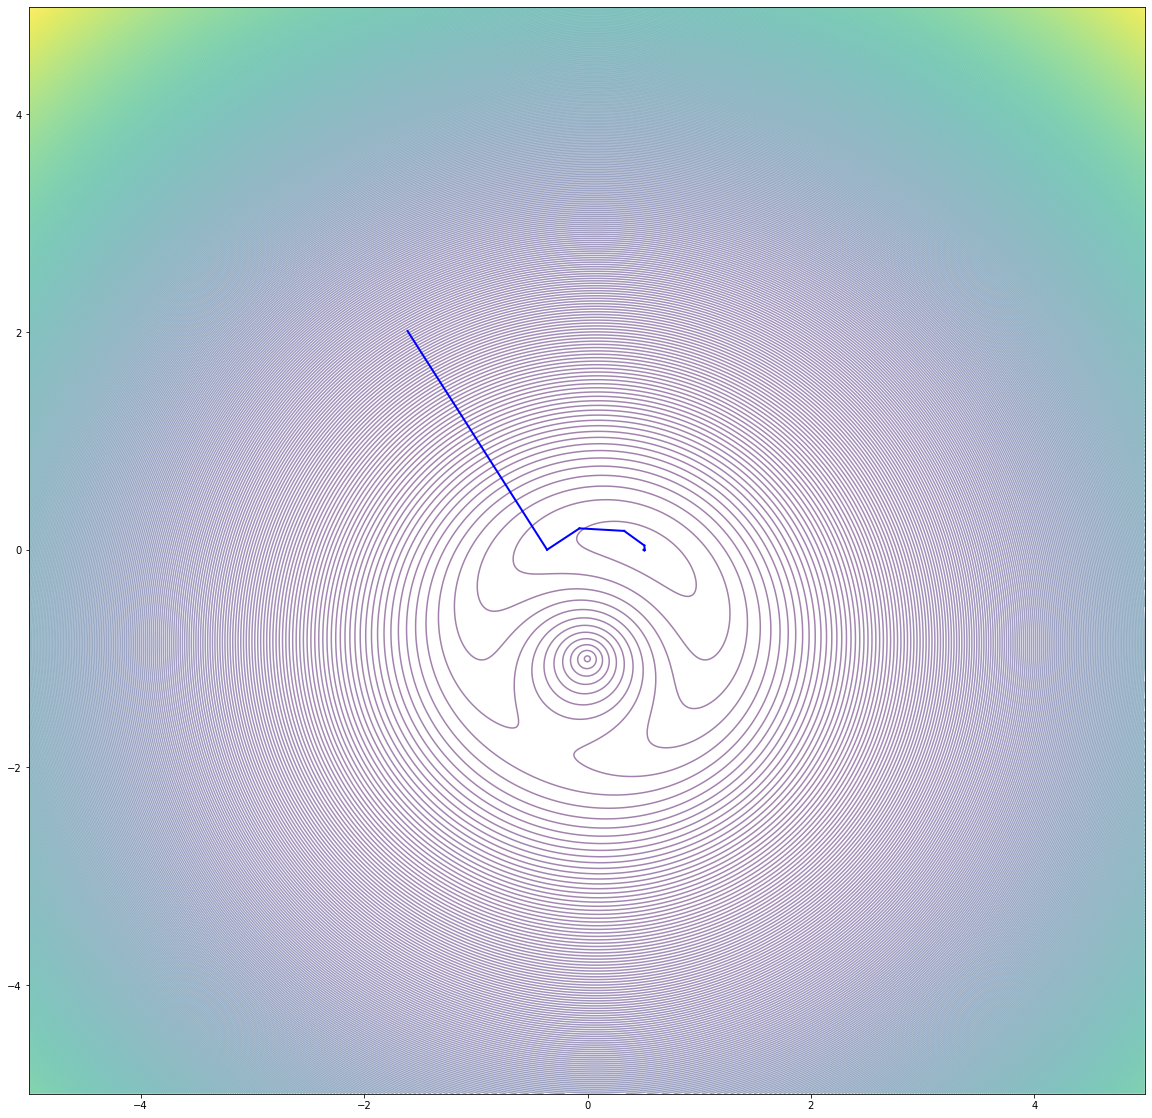

In [5]:

#Step 1
delta = 0.01
epsilon1 = 0.001
epsilon2 = 0.001
X = [-1,1]
X1

xlim = [-1,1]

#Graficar la figura
fig = plt.figure(figsize=(20,20))
#axis
#ax = fig.add_subplot(projection = '3d')
ax = fig.add_subplot()
surf = ax.contour(x1, x2, z,500, alpha=0.5)

dfx = -gradient(X,delta)
Si = -dfx
alpha,falpha = golden(X,dfx,xlim,epsilon1)
Xi = X
X = X+alpha*Si

#Step 2
for i in range(200):
    X1=X.copy()

    #ax.scatter(X[0],X[1])

    fx=f(X)

    # print("alpha=",alpha)
    # print("X=",X)

    #Step 3
    Si1 = -gradient(X,delta)+ ((la.norm(gradient(X,delta))**2) / (la.norm(gradient(Xi,delta))**2)) * Si
    alpha,falpha = golden(X,Si1,xlim,epsilon1)

    print(Si1)

    Xi=X
    Si = Si1
    
    X = X+alpha*Si1

    ax.plot([X[0],X1[0]],[X[1],X1[1]],'b',linewidth=2)

    if(abs(fx-f(X))<=epsilon1):
        print("Iteraciones =",i)
        break

print(f(X))

